# Feature Engineering 

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1.) Import packages

In [93]:
import warnings
warnings.filterwarnings("ignore")

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import os

# Shows plots in jupyter notebook
%matplotlib inline

sns.set(style="darkgrid",font_scale=1.5)

---
## 2.) Loading data

In [95]:
df=pd.read_csv('../data/processed_data/customer_churn_data.csv')

In [96]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes


---

## 3.) Feature engineering

### 3.1 Creating New Feature From "NumOfProducts" Feature.


In [97]:
conditions = [(df["NumOfProducts"]==1), (df["NumOfProducts"]==2), (df["NumOfProducts"]>2)]
values =     ["One product","Two Products","More Than 2 Products"]

In [98]:
df["Total_Products"] = np.select(conditions,values)

In [99]:
df.drop(columns="NumOfProducts", inplace=True)

### 3.2. Creating New Feature From "Balance" Feature

In [100]:
conditions = [(df["Balance"]==0), (df["Balance"]>0)]
values = ["Zero Balance","More Than zero Balance"]

In [101]:
df["Account_Balance"] = np.select(conditions, values)

In [102]:
df.drop(columns="Balance",inplace=True)

---
# Data Preprocessing
---

### 1. Computing Unique Values of Categorical Columns.

In [103]:
cat_cols = ["Geography","Gender","Total_Products","Account_Balance"]

for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())
    print("-"*100,"\n")

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
---------------------------------------------------------------------------------------------------- 

Unique Values in Gender column is: ['Female' 'Male']
---------------------------------------------------------------------------------------------------- 

Unique Values in Total_Products column is: ['One product' 'More Than 2 Products' 'Two Products']
---------------------------------------------------------------------------------------------------- 

Unique Values in Account_Balance column is: ['Zero Balance' 'More Than zero Balance']
---------------------------------------------------------------------------------------------------- 



### 2. Performing One Hot Encoding on Categorical Features.

In [104]:
df = pd.get_dummies(columns=cat_cols, data=df)

### 3. Encoding Target Variable.

In [105]:
df["Churned"].replace({"No":0,"Yes":1},inplace=True)

In [106]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
0,619,42,2,1,1,101348.88,1,True,False,False,True,False,False,True,False,False,True
1,608,41,1,0,1,112542.58,0,False,False,True,True,False,False,True,False,True,False
2,502,42,8,1,0,113931.57,1,True,False,False,True,False,True,False,False,True,False
3,699,39,1,0,0,93826.63,0,True,False,False,True,False,False,False,True,False,True
4,850,43,2,1,1,79084.10,0,False,False,True,True,False,False,True,False,True,False


### 4. Checking Skewness of Continous Features.

In [107]:
cols = ["CreditScore","Age","EstimatedSalary"]

In [108]:
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085


 Insight:
- Age Feature is highly right-skewed , which conveys that there is presence of positive outliers.
- Skewness can negatively impact the performance of certain machine learning algorithms, like DecisionTree & Linear Models.
- To overcome the right-skewed distribution we can use log normal transformation to achieve a normal distribution.

### 4.1 Performing Log Transformation on Age Column.

In [109]:
old_age = df["Age"]     ##Storing the previous Age values to compare these values with the transformed values.

In [110]:
df["Age"] = np.log(df["Age"])

### 5. Visualizing Age Before and After Transformation.

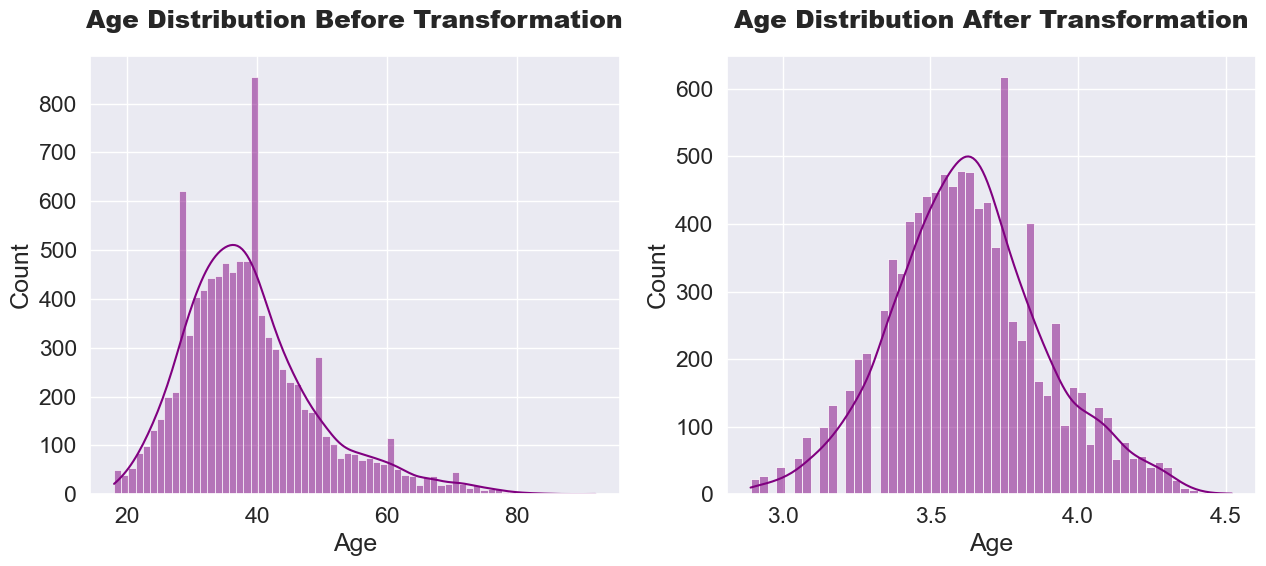

In [111]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age, color="purple", kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(df["Age"], color="purple", kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

Insight:
- After applying log normal transformation the age feature has achieved a normal distribution.
- This will help model to find more relevant patterns and build a more accurate model.

---
## 6. Save the feature engineered Data
Save the dataset in engineered features file.

In [112]:
save_location = '../data/feature_engineered_data/customer_churn_data.csv'
os.makedirs(os.path.dirname(save_location), exist_ok=True)  # Ensure the directory exists
df.to_csv(save_location, index=False)